<a href="https://colab.research.google.com/github/ASi-F/NLPlay-Checkpoint-1/blob/main/Week_2_Sentiment_analysis_using_feed_forwar_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import torch
import numpy as np
import nltk
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [74]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [75]:
print(df.columns)
df.describe()

Index(['review', 'sentiment'], dtype='object')


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['without_stopwords'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
df['without_stopwords'][0]

"One reviewers mentioned watching 1 Oz episode hooked. They right, exactly happened me.<br /><br />The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. This show pulls punches regards drugs, sex violence. Its hardcore, classic use word.<br /><br />It called OZ nickname given Oswald Maximum Security State Penitentary. It focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.<br /><br />I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. The first episode I ever saw struck nasty surreal, I say I ready it, I watched more, I developed taste Oz, got accustomed high levels graphic violence. Not violence, in

In [18]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', ','))
    return final

df['without_stopwords'] = df['without_stopwords'].apply(remove_punctuation)

In [19]:
def remove_tags(text):
    final = ""
    stt = True
    for char in text:
        if char == '<':
            stt = False
        if(stt):
            final = final + char
        if char == '>':
            stt = True
            final = final + ' '
    return final
df['without_stopwords'] = df['without_stopwords'].apply(remove_tags)

In [20]:
df['without_stopwords'][0]

"One reviewers mentioned watching 1 Oz episode hooked They right exactly happened me  The first thing struck Oz brutality unflinching scenes violence set right word GO Trust me show faint hearted timid This show pulls punches regards drugs sex violence Its hardcore classic use word  It called OZ nickname given Oswald Maximum Security State Penitentary It focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far away  I would say main appeal show due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ mess around The first episode I ever saw struck nasty surreal I say I ready it I watched more I developed taste Oz got accustomed high levels graphic violence Not violence injustice (crooked guards who'll sold nickel inmates who'll kill order get 

In [21]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['tokens'] = df['without_stopwords'].apply(nltk.word_tokenize)

In [25]:
df['tokens'][0]

['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 'hooked',
 'They',
 'right',
 'exactly',
 'happened',
 'me',
 'The',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'GO',
 'Trust',
 'me',
 'show',
 'faint',
 'hearted',
 'timid',
 'This',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'Its',
 'hardcore',
 'classic',
 'use',
 'word',
 'It',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 'It',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'Em',
 'City',
 'home',
 'manyAryans',
 'Muslims',
 'gangstas',
 'Latinos',
 'Christians',
 'Italians',
 'Irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'I',
 'would',
 's

In [26]:
def stem_tokens(tokens):
    final = [nltk.stem.PorterStemmer().stem(word) for word in tokens]
    return final
    
df['stemmed_tokens'] = df['tokens'].apply(stem_tokens)

In [27]:
df['stemmed_tokens'][0]

['one',
 'review',
 'mention',
 'watch',
 '1',
 'Oz',
 'episod',
 'hook',
 'they',
 'right',
 'exactli',
 'happen',
 'me',
 'the',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'GO',
 'trust',
 'me',
 'show',
 'faint',
 'heart',
 'timid',
 'thi',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'it',
 'hardcor',
 'classic',
 'use',
 'word',
 'It',
 'call',
 'OZ',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'It',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'Em',
 'citi',
 'home',
 'manyaryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'I',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',


In [28]:
df['label'] = [2*(sent=='positive')-1 for sent in df['sentiment']]

In [29]:
df['label']

0        1
1        1
2        1
3       -1
4        1
        ..
49995    1
49996   -1
49997   -1
49998   -1
49999   -1
Name: label, Length: 50000, dtype: int64

In [30]:
df.head(9)

,review,sentiment,without_stopwords,tokens,stemmed_tokens,label
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...,"[One, reviewers, mentioned, watching, 1, Oz, e...","[one, review, mention, watch, 1, Oz, episod, h...",1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming te...,"[A, wonderful, little, production, The, filmin...","[A, wonder, littl, product, the, film, techniq...",1
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,"[I, thought, wonderful, way, spend, time, hot,...","[I, thought, wonder, way, spend, time, hot, su...",1
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...,"[Basically, there, 's, family, little, boy, (,...","[basic, there, 's, famili, littl, boy, (, jake...",-1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei's Love Time Money visually stunn...,"[Petter, Mattei, 's, Love, Time, Money, visual...","[petter, mattei, 's, love, time, money, visual...",1
5,"Probably my all-time favorite movie, a story o...",positive,Probably all-time favorite movie story selfles...,"[Probably, all-time, favorite, movie, story, s...","[probabl, all-tim, favorit, movi, stori, selfl...",1
6,I sure would like to see a resurrection of a u...,positive,I sure would like see resurrection dated Seahu...,"[I, sure, would, like, see, resurrection, date...","[I, sure, would, like, see, resurrect, date, s...",1
7,"This show was an amazing, fresh & innovative i...",negative,This show amazing fresh & innovative idea 70's...,"[This, show, amazing, fresh, &, innovative, id...","[thi, show, amaz, fresh, &, innov, idea, 70, '...",-1
8,Encouraged by the positive comments about this...,negative,Encouraged positive comments film I looking fo...,"[Encouraged, positive, comments, film, I, look...","[encourag, posit, comment, film, I, look, forw...",-1


In [31]:
df.index

RangeIndex(start=0, stop=50000, step=1)

In [32]:
from gensim import corpora

review_dict = corpora.Dictionary(df['stemmed_tokens'])
review_dict[0]

"'ll"

In [33]:
print(type(review_dict))
print(type(review_dict[0]))
print(type(review_dict[0][0]))

<class 'gensim.corpora.dictionary.Dictionary'>
<class 'str'>
<class 'str'>


In [34]:
print(review_dict)

Dictionary(133824 unique tokens: ["'ll", '(', ')', '1', 'Em']...)


In [35]:
from sklearn.model_selection import train_test_split
# Train Test Split Function

def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['review','sentiment','without_stopwords','tokens','stemmed_tokens','label']], 
                                                        top_data_df_small['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
-1    17512
 1    17488
Name: label, dtype: int64
Value counts for Test sentiments
 1    7512
-1    7488
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  ... label
0  36322  ...     1
1   4638  ...     1
2  46808  ...    -1
3  38099  ...    -1
4  31461  ...     1

[5 rows x 7 columns]


In [36]:
X_train

,index,review,sentiment,without_stopwords,tokens,stemmed_tokens,label
0,36322,The sequel is exactly what you will expect it ...,positive,The sequel exactly expect be And good enough e...,"[The, sequel, exactly, expect, be, And, good, ...","[the, sequel, exactli, expect, be, and, good, ...",1
1,4638,This is a pretty well known one so i won't get...,positive,This pretty well known one get deep it The bas...,"[This, pretty, well, known, one, get, deep, it...","[thi, pretti, well, known, one, get, deep, it,...",1
2,46808,I made the mistake of buying this since I coll...,negative,I made mistake buying since I collect comic bo...,"[I, made, mistake, buying, since, I, collect, ...","[I, made, mistak, buy, sinc, I, collect, comic...",-1
3,38099,This movie is the proverbial 80s flick that sh...,negative,This movie proverbial 80s flick shows viewer l...,"[This, movie, proverbial, 80s, flick, shows, v...","[thi, movi, proverbi, 80, flick, show, viewer,...",-1
4,31461,I absolutely LOVED this movie as a child. I ca...,positive,I absolutely LOVED movie child I can't seem fi...,"[I, absolutely, LOVED, movie, child, I, ca, n'...","[I, absolut, love, movi, child, I, ca, n't, se...",1
...,...,...,...,...,...,...,...
34995,39296,"When i started watching ""Surface""for the first...",positive,When started watching Surfacefor first time ho...,"[When, started, watching, Surfacefor, first, t...","[when, start, watch, surfacefor, first, time, ...",1
34996,49015,Are you kidding me? This is quite possibly the...,negative,Are kidding me This quite possibly worst amate...,"[Are, kidding, me, This, quite, possibly, wors...","[are, kid, me, thi, quit, possibl, worst, amat...",-1
34997,2693,One would make you believe that this game is a...,negative,One would make believe game man obsessed numbe...,"[One, would, make, believe, game, man, obsesse...","[one, would, make, believ, game, man, obsess, ...",-1
34998,8076,I'D BUY THAT FOR A DOLLAR!!!<br /><br />I did ...,positive,I'D BUY THAT FOR A DOLLAR I buy film dollar I...,"[I, 'D, BUY, THAT, FOR, A, DOLLAR, I, buy, fil...","[I, 'D, buy, that, for, A, dollar, I, buy, fil...",1


In [37]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [38]:
# define FeedforwardNeuralNetwork
class FeedForwardNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(FeedForwardNN,self).__init__()
        
        # Linear fnction 1
        self.LF1 = nn.Linear(input_size,hidden_size)
        # Nonlinear fnction 1
        self.NLF1 = nn.ReLU()
        
        # Linear function 2
        self.LF2 = nn.Linear(hidden_size,hidden_size)
        # Nonlinear fnction 2
        self.NLF2 = nn.ReLU()
        
        #Linear function 2
        self.LF3 = nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        # Layer 1
        out = self.LF1(x)
        out = self.NLF1(out)
        
        #Layer 2 
        out = self.LF2(out)
        out = self.NLF2(out)
        
        #Layer 3
        out = self.LF3(out)
        
        return F.softmax(out,dim=1)
        

In [39]:
VOCAB_SIZE = len(review_dict)
NUM_LABELS = 2

def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE,dtype = torch.float64, device = device)
    for word in sentence:
        vec[review_dict.token2id[word]]+=1
    return vec.reshape(1,-1).float()

In [40]:
def make_pred(label):
    if label == -1:
        return torch.tensor([0], dtype = torch.long, device = device)
    elif label == 1:
        return torch.tensor([1], dtype = torch.long, device = device)

In [105]:
VOCAB_SIZE = len(review_dict)

input_size = VOCAB_SIZE
hidden_dim = 500
output_size = 2
num_epochs = 2
batch_size = 200

FFNN = FeedForwardNN(input_size,hidden_dim,output_size)
FFNN.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(FFNN.parameters(), lr = 0.005)

In [106]:

def train(num_epochs,batch_size,optimizer,loss_function = nn.CrossEntropyLoss()):
  losses = []
  for epoch in range(num_epochs):
      print("Epoch completed: " + str(epoch+1)+'\n'+'\n')
      train_loss = torch.tensor([0.],device = device)
      ittr = 0
      for index,row in X_train.iterrows():
          ittr+=1

          # make bag of word vector 
          bow_vec = make_bow_vector(review_dict,row['stemmed_tokens'])
        
          # Forward pass
          preds = FFNN(bow_vec)
        
          # get target label
          target = make_pred(Y_train['label'][index])

          loss = loss_function(preds, target)
  
          train_loss +=loss
        
          # loss.backward()
          if ittr%batch_size ==0:
            # clear gradients
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            print(ittr//batch_size,'. - ',train_loss.item(),sep = '')
            losses.append(train_loss.item())
            train_loss = 0.
  return losses
        
losses = train(num_epochs,200,optimizer)

Epoch completed: 1


1. - 138.5938262939453
2. - 138.49436950683594
3. - 138.22259521484375
4. - 137.74659729003906
5. - 137.1334991455078
6. - 137.29595947265625
7. - 136.03028869628906
8. - 136.54359436035156
9. - 138.3970184326172
10. - 135.93716430664062
11. - 133.0010986328125
12. - 132.03662109375
13. - 132.71685791015625
14. - 127.44023132324219
15. - 126.38837432861328
16. - 139.2098388671875
17. - 132.6240692138672
18. - 122.5003433227539
19. - 117.039306640625
20. - 119.59672546386719
21. - 146.31707763671875
22. - 149.0657958984375
23. - 123.72023010253906
24. - 125.54415893554688
25. - 115.26766204833984
26. - 143.0775909423828
27. - 119.6473617553711
28. - 125.07797241210938
29. - 121.35200500488281
30. - 119.79888153076172
31. - 116.6375503540039
32. - 127.01080322265625
33. - 122.37214660644531
34. - 117.79441833496094
35. - 117.69505310058594
36. - 111.12803649902344
37. - 101.14778137207031
38. - 117.60206604003906
39. - 126.18077087402344
40. - 131.4944610595703
41. -

In [108]:
def accuracy():
  correct_preds = 0
  for index,row in X_test.iterrows():
    bow_vec = make_bow_vector(review_dict,row['stemmed_tokens'])
    # Forward pass
    preds = list(FFNN(bow_vec)[0])
    if preds[0]>preds[1]:
      out = -1
    else :
      out = +1
    if out == row['label']:
      correct_preds+=1
  
  return correct_preds*100/len(X_test)

def plot_loss(losses):
  x = [i for i in range(0,len(losses))]
  plt.plot(x,losses)
  plt.title('Loss fnction')
  plt.ylabel('Loss')
  plt.xlabel('batch index')

In [109]:
accuracy()

85.65333333333334

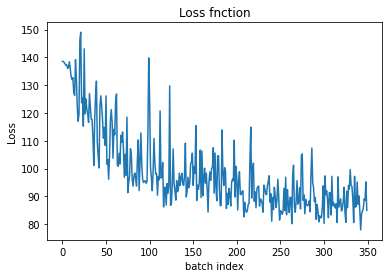

In [111]:
plot_loss(losses)

In [115]:
optimizer = optim.SGD(FFNN.parameters(), lr = 0.001)
num_epochs = 2
batch_size = 100
losses = train(num_epochs,batch_size,optimizer)

Epoch completed: 1


1. - 46.23515701293945
2. - 42.09413146972656
3. - 40.46958541870117
4. - 45.516483306884766
5. - 38.47571563720703
6. - 42.388187408447266
7. - 51.48405456542969
8. - 42.02943420410156
9. - 41.12185287475586
10. - 41.99711227416992
11. - 41.99148178100586
12. - 45.1903190612793
13. - 40.127567291259766
14. - 40.532859802246094
15. - 36.620872497558594
16. - 41.340667724609375
17. - 43.477760314941406
18. - 41.83485794067383
19. - 45.27916717529297
20. - 45.13857650756836
21. - 43.51194381713867
22. - 41.93963623046875
23. - 41.967872619628906
24. - 38.34674835205078
25. - 41.58163070678711
26. - 45.82146453857422
27. - 40.57461929321289
28. - 36.95241928100586
29. - 40.99321746826172
30. - 39.04756546020508
31. - 39.054100036621094
32. - 40.644046783447266
33. - 43.569557189941406
34. - 43.47922897338867
35. - 40.28559494018555
36. - 38.61457824707031
37. - 36.972328186035156
38. - 41.69867706298828
39. - 40.930423736572266
40. - 43.341880798339844
41. - 41.743644

87.68


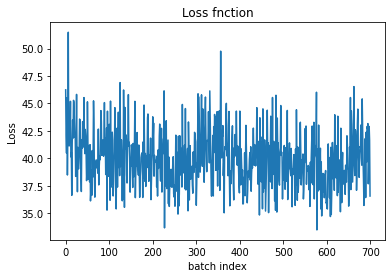

In [116]:
print(accuracy())

plot_loss(losses)

In [117]:
optimizer = optim.SGD(FFNN.parameters(), lr = 0.0005)
num_epochs = 3
batch_size = 1000
losses = train(num_epochs,batch_size,optimizer)

Epoch completed: 1


1. - 418.1130065917969
2. - 401.1060791015625
3. - 394.21392822265625
4. - 397.7472839355469
5. - 408.1247253417969
6. - 395.6273498535156
7. - 383.229736328125
8. - 381.2958984375
9. - 403.4866943359375
10. - 394.2380065917969
11. - 390.07489013671875
12. - 390.808349609375
13. - 400.278564453125
14. - 392.0953674316406
15. - 391.6490783691406
16. - 391.97589111328125
17. - 388.16259765625
18. - 381.2806396484375
19. - 393.72589111328125
20. - 384.27862548828125
21. - 392.1434326171875
22. - 389.7345275878906
23. - 402.10498046875
24. - 391.0741882324219
25. - 376.96209716796875
26. - 380.0176086425781
27. - 388.2361755371094
28. - 388.478515625
29. - 382.2144470214844
30. - 384.8060302734375
31. - 400.2113342285156
32. - 401.5812683105469
33. - 405.8754577636719
34. - 392.0577392578125
35. - 404.72625732421875
Epoch completed: 2


1. - 421.3009033203125
2. - 400.1432189941406
3. - 393.2162170410156
4. - 393.46588134765625
5. - 397.0809020996094
6. - 383.647155761

87.62


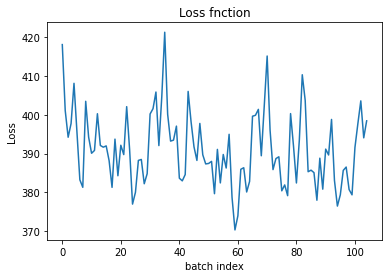

In [119]:
print(accuracy())

plot_loss(losses)

In [ ]:
optimizer = optim.SGD(FFNN.parameters(), lr = 1e-6)
num_epochs = 5
batch_size = 5000
losses = train(num_epochs,batch_size,optimizer)

Epoch completed: 1


1. - 1989.481689453125
2. - 1957.4649658203125
3. - 1979.4774169921875
4. - 1979.3077392578125
5. - 1927.5804443359375
6. - 1945.395751953125
7. - 1975.77685546875
Epoch completed: 2


1. - 1981.318359375
2. - 1949.2296142578125
3. - 1969.504638671875
4. - 1969.602783203125
5. - 1921.0030517578125
6. - 1935.1182861328125
7. - 1969.6265869140625
Epoch completed: 3


1. - 1974.8643798828125


In [ ]:
print(accuracy())

plot_loss(losses)

In [ ]:
optimizer = optim.SGD(FFNN.parameters(), lr = 1e-4)
num_epochs = 3
batch_size = 10
losses = train(num_epochs,batch_size,optimizer)

In [ ]:
print(accuracy())

plot_loss(losses)